# ADD TWO NUMBERS

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

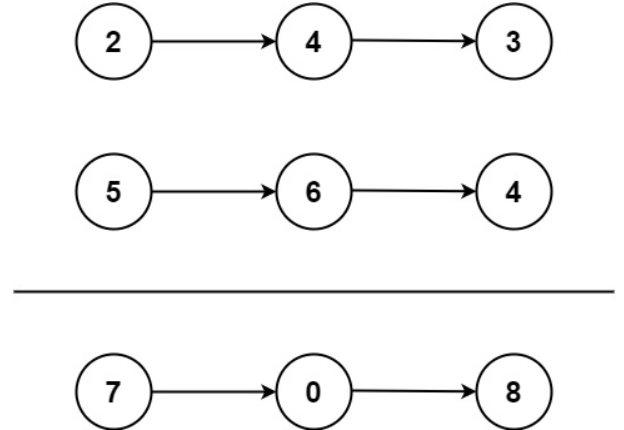

### Example 1:

Input: l1 = [2,4,3], l2 = [5,6,4]

Output: [7,0,8]

Explanation: 342 + 465 = 807.

### Example 2:

Input: l1 = [0], l2 = [0]

Output: [0]

### Example 3:

Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]

Output: [8,9,9,9,0,0,0,1]

### Constraints:

The number of nodes in each linked list is in the range [1, 100].
0 <= Node.val <= 9
It is guaranteed that the list represents a number that does not have leading zeros.

## Elementary Math

### Intuition

Keep track of the carry using a variable and simulate digits-by-digits sum starting from the head of list, which contains the least-significant digit.

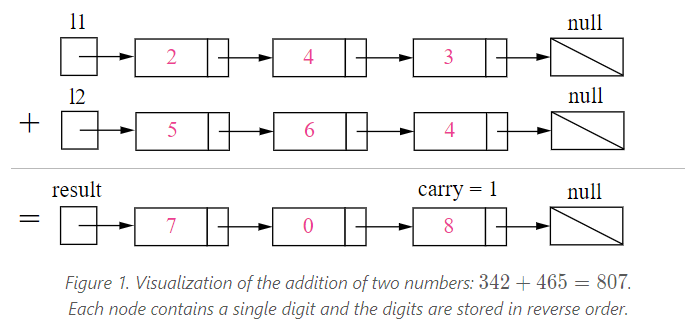

### Algorithm

Just like how you would sum two numbers on a piece of paper, we begin by summing the least-significant digits, which is the head of l1l1 and l2l2. Since each digit is in the range of 0…9, summing two digits may "overflow". For example 5+7=12. In this case, we set the current digit to 22 and bring over the carry = 1carry=1 to the next iteration. carrycarry must be either 00 or 11 because the largest possible sum of two digits (including the carry) is 9+9+1=19.

The pseudocode is as following:

- Initialize current node to dummy head of the returning list.
- Initialize carry to 0.
- Initialize p and q to head of l1 and l2 respectively.
- Loop through lists l1 and l2 until you reach both ends.
    - Set xx to node p's value. If pp has reached the end of l1, set to 0.
    - Set yy to node q's value. If qq has reached the end of l2, set to 0.
    - Set sum=x+y+carry
    - Update carry=sum/10.
    - Create a new node with the digit value of sum%10 and set it to current node's next, then advance current node to next.
    - Advance both p and q.
- Check if carry=1, if so append a new node with digit 11 to the returning list.
- Return dummy head's next node.

Note that we use a dummy head to simplify the code. Without a dummy head, you would have to write extra conditional statements to initialize the head's value.

Take extra caution of the following cases:

- When one list is longer than the other.

    l1=[0,1]l1=[0,1]

    l2=[0,1,2]l2=[0,1,2]	


- When one list is null, which means an empty list.

    l1=[]l1=[]

    l2=[0,1]l2=[0,1]	


- The sum could have an extra carry of one at the end, which is easy to forget.

    l1=[9,9]l1=[9,9]

    l2=[1]l2=[1]	

In [136]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        ans = []
        sum = 0
        carry = 0
        while(True):
            try:
                sum = l1.val + l2.val + carry
                l1 = l1.next
                l2 = l2.next
            except:
                try:
                    sum = l1.val + carry
                    l1 = l1.next
                except:
                    try:
                        sum = l2.val + carry
                        l2 = l2.next
                    except:
                        break
            if sum >= 10:
                sum = sum % 10
                carry = 1
            else:
                carry = 0
            ans.append(sum)
        if carry:
            ans.append(carry)
        result = ListNode(ans[0])
        node = result
        for i in range(1,len(ans)):
            node.next = ListNode(ans[i])
            node = node.next
        return result

In [138]:
Solution.addTwoNumbers(Solution.addTwoNumbers, [9,9,9,9,9,9,9], [9,9,9,9])

[8, 9, 9, 9, 0, 0, 0, 1]


### Complexity Analysis

- Time complexity : O(max(m,n)). Assume that mm and nn represents the length of l1 and l2 respectively, the algorithm above iterates at most max(m,n) times.

- Space complexity : O(max(m,n)). The length of the new list is at most max(m,n)+1.